In [3]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('C:\\train.csv')


In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Drop any remaining rows with missing values
df.dropna(inplace=True)

# Convert appropriate columns to categorical types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Check the cleaned dataset
print(df.info())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB
None


In [5]:
# Summary statistics
print(df.describe(include='all'))



        PassengerId  Survived  Pclass                     Name   Sex  \
count    891.000000     891.0   891.0                      891   891   
unique          NaN       2.0     3.0                      891     2   
top             NaN       0.0     3.0  Braund, Mr. Owen Harris  male   
freq            NaN     549.0   491.0                        1   577   
mean     446.000000       NaN     NaN                      NaN   NaN   
std      257.353842       NaN     NaN                      NaN   NaN   
min        1.000000       NaN     NaN                      NaN   NaN   
25%      223.500000       NaN     NaN                      NaN   NaN   
50%      446.000000       NaN     NaN                      NaN   NaN   
75%      668.500000       NaN     NaN                      NaN   NaN   
max      891.000000       NaN     NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   891.000000  891.000000  891.000000     891  891.00000

F:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


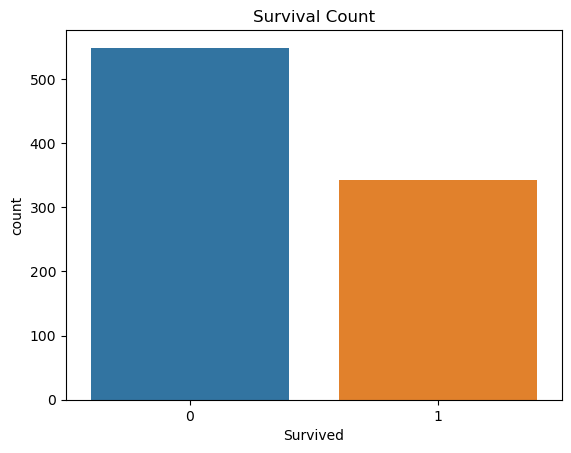

F:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

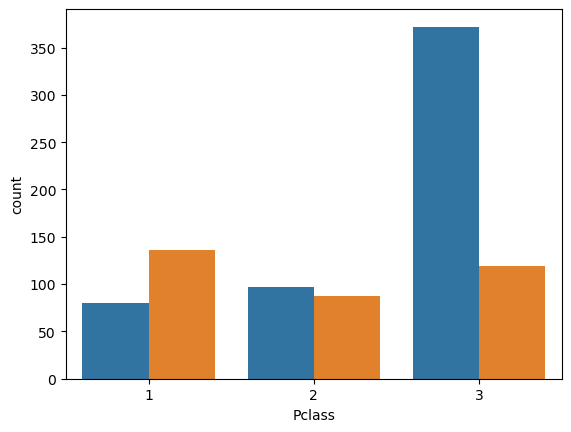

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival Rate by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Class')
plt.show()

# Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, label='Survived', color='green')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, label='Not Survived', color='red')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

# Survival Rate by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Pairplot to see relationships between features
sns.pairplot(df, hue='Survived')
plt.show()
